In [1]:
import os 
import pathlib


In [6]:
path = pathlib.Path("D:\Jupyter Notebook\Pistacio Dataset Images\Pistachio_Image_Dataset\Pistachio_Image_Dataset")
path

WindowsPath('D:/Jupyter Notebook/Pistacio Dataset Images/Pistachio_Image_Dataset/Pistachio_Image_Dataset')

In [12]:
pistachio_images = {
    "kirmizi" : list(path.glob("kirmizi_Pistachio/*")),
    "siirt" : list(path.glob("Siirt_Pistachio/*"))
}

pistachio_label = {
    "kirmizi" : 0,
    "siirt" : 1
}

In [21]:
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread(pistachio_images["kirmizi"][0])

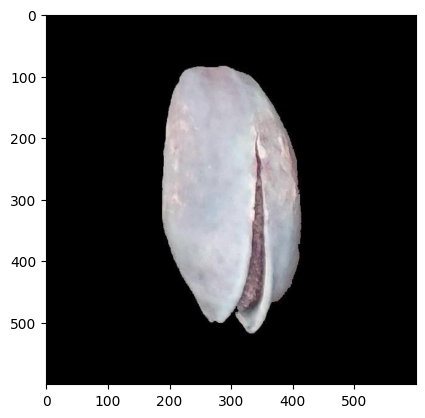

In [24]:
plt.imshow(img)
plt.show()

In [32]:
img.shape

(600, 600, 3)

In [33]:
X = []
y = []

for pn , pi in  pistachio_images.items():
    for pic in pi:
        img = cv.imread(pic)
        img = cv.resize(img,(150,150))
        X.append(img)
        y.append(pistachio_label[pn])
    

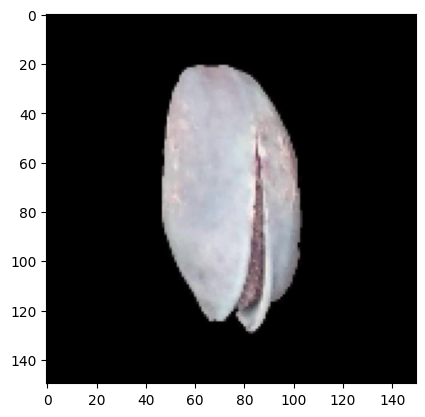

In [37]:
%matplotlib inline
plt.imshow(X[0])
plt.show()

In [65]:
import numpy as np
X = np.array(X)
y = np.array(y)

In [66]:
from sklearn.model_selection import train_test_split

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

In [67]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [68]:
len(X_train) , len(X_test) , len(y_train) , len(y_test)

(1718, 430, 1718, 430)

In [71]:
from tensorflow import keras
import tensorflow as tf

model = keras.Sequential([
    ### CNN
    keras.layers.Conv2D(16,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),

    keras.layers.Conv2D(32,3,padding="same",activation="relu"),
    keras.layers.MaxPooling2D(),

    ## Dense
    keras.layers.Flatten(),
    keras.layers.Dense(100,activation="relu"),
    keras.layers.Dense(2,activation="sigmoid")
])


model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

In [62]:
X.shape

(2148, 150, 150, 3)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [72]:
model.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5


C:\Users\Hamza\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\backend\tensorflow\nn.py:635: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


54/54 ━━━━━━━━━━━━━━━━━━━━ 23s 293ms/step - accuracy: 0.6129 - loss: 127.3667
Epoch 2/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 16s 295ms/step - accuracy: 0.8938 - loss: 0.2652
Epoch 3/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 284ms/step - accuracy: 0.9252 - loss: 0.1971
Epoch 4/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 15s 286ms/step - accuracy: 0.9625 - loss: 0.1233
Epoch 5/5
54/54 ━━━━━━━━━━━━━━━━━━━━ 21s 294ms/step - accuracy: 0.9722 - loss: 0.0864


In [84]:
y_pred = model.predict(X_test_scaled)

14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 40ms/step


In [99]:
y_pred[2].argmax()

np.int64(0)

In [100]:
y_test[2]

np.int64(0)

In [94]:
pistachio_label

{'kirmizi': 0, 'siirt': 1}

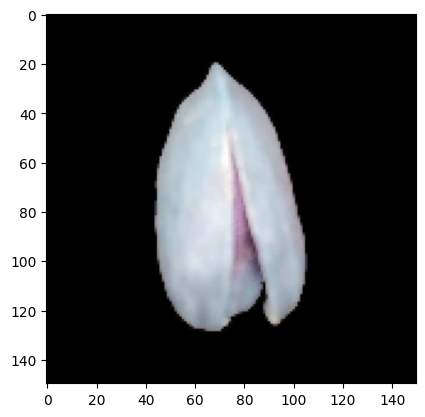

In [103]:
plt.imshow(X_test[2])
plt.show()